# Business objective

Classifying the houses into different grades i.e.,A,B,C,D,E based on the different features.

In [58]:
#importing libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn library
import sklearn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#errors
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the file
house_df= pd.read_csv('D:\data science\level_3\project_2\DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
house_df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
house_df.shape

(3000, 14)

In [4]:
#Checking the datatype of each feature
house_df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [5]:
#Checking the null values
house_df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [6]:
#Duplicating the data
new_house_df= house_df.copy()

In [7]:
#feature engineering (converting categorical column to numerical column)
for col in house_df.columns:
    if house_df[col].dtypes=='object':
        #print(col)
        house_df[col]= LabelEncoder().fit_transform(house_df[col])
house_df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3


In [8]:
#scaling the data
scaler= MinMaxScaler()

#excluding target column for scaling
house_df1= house_df.drop('Grade',axis=1)
scaled_df= pd.DataFrame(scaler.fit_transform(house_df1.to_numpy()), columns=house_df1.columns)

#appending target column to scaled data
scaled_df['Grade']= house_df['Grade']
scaled_df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251,3
1,0.000333,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944,3
2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702,2
3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301,3
4,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732,3


In [9]:
#plotting correlation map
corr= scaled_df.corr()
corr.style.background_gradient(cmap='Greens')

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


In [10]:
#Selecting best features which are highly correlated with target column
features=[]
for col in corr:
    if abs(scaled_df[col].corr(scaled_df['Grade']))>0.1:
        features.append(col)
features

['Area(total)',
 'Trooms',
 'Nbedrooms',
 'Nbwashrooms',
 'Twashrooms',
 'roof',
 'Roof(Area)',
 'Nfloors',
 'Expected price',
 'Grade']

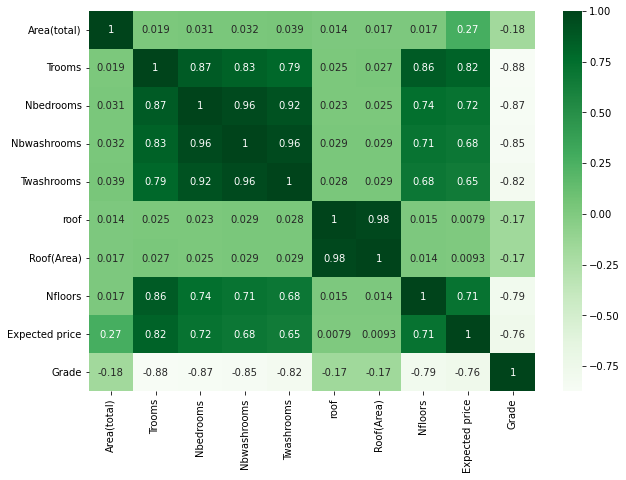

In [11]:
#heatmap for the selected features
new_scaled_df= scaled_df[features]
plt.figure(figsize=(10,7))
sns.heatmap(new_scaled_df.corr(),annot=True, cmap='Greens',fmt='.2g')
plt.show()

# EDA

<AxesSubplot:xlabel='Grade', ylabel='count'>

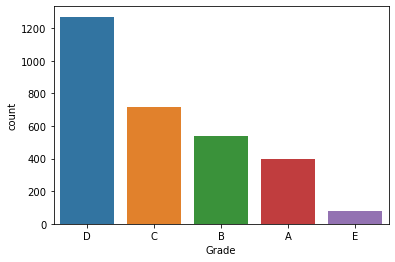

In [12]:
#Grade wise total count of houses
sns.countplot(new_house_df['Grade'])

The houses in grade-D are more. The houses in Grade-E are less.

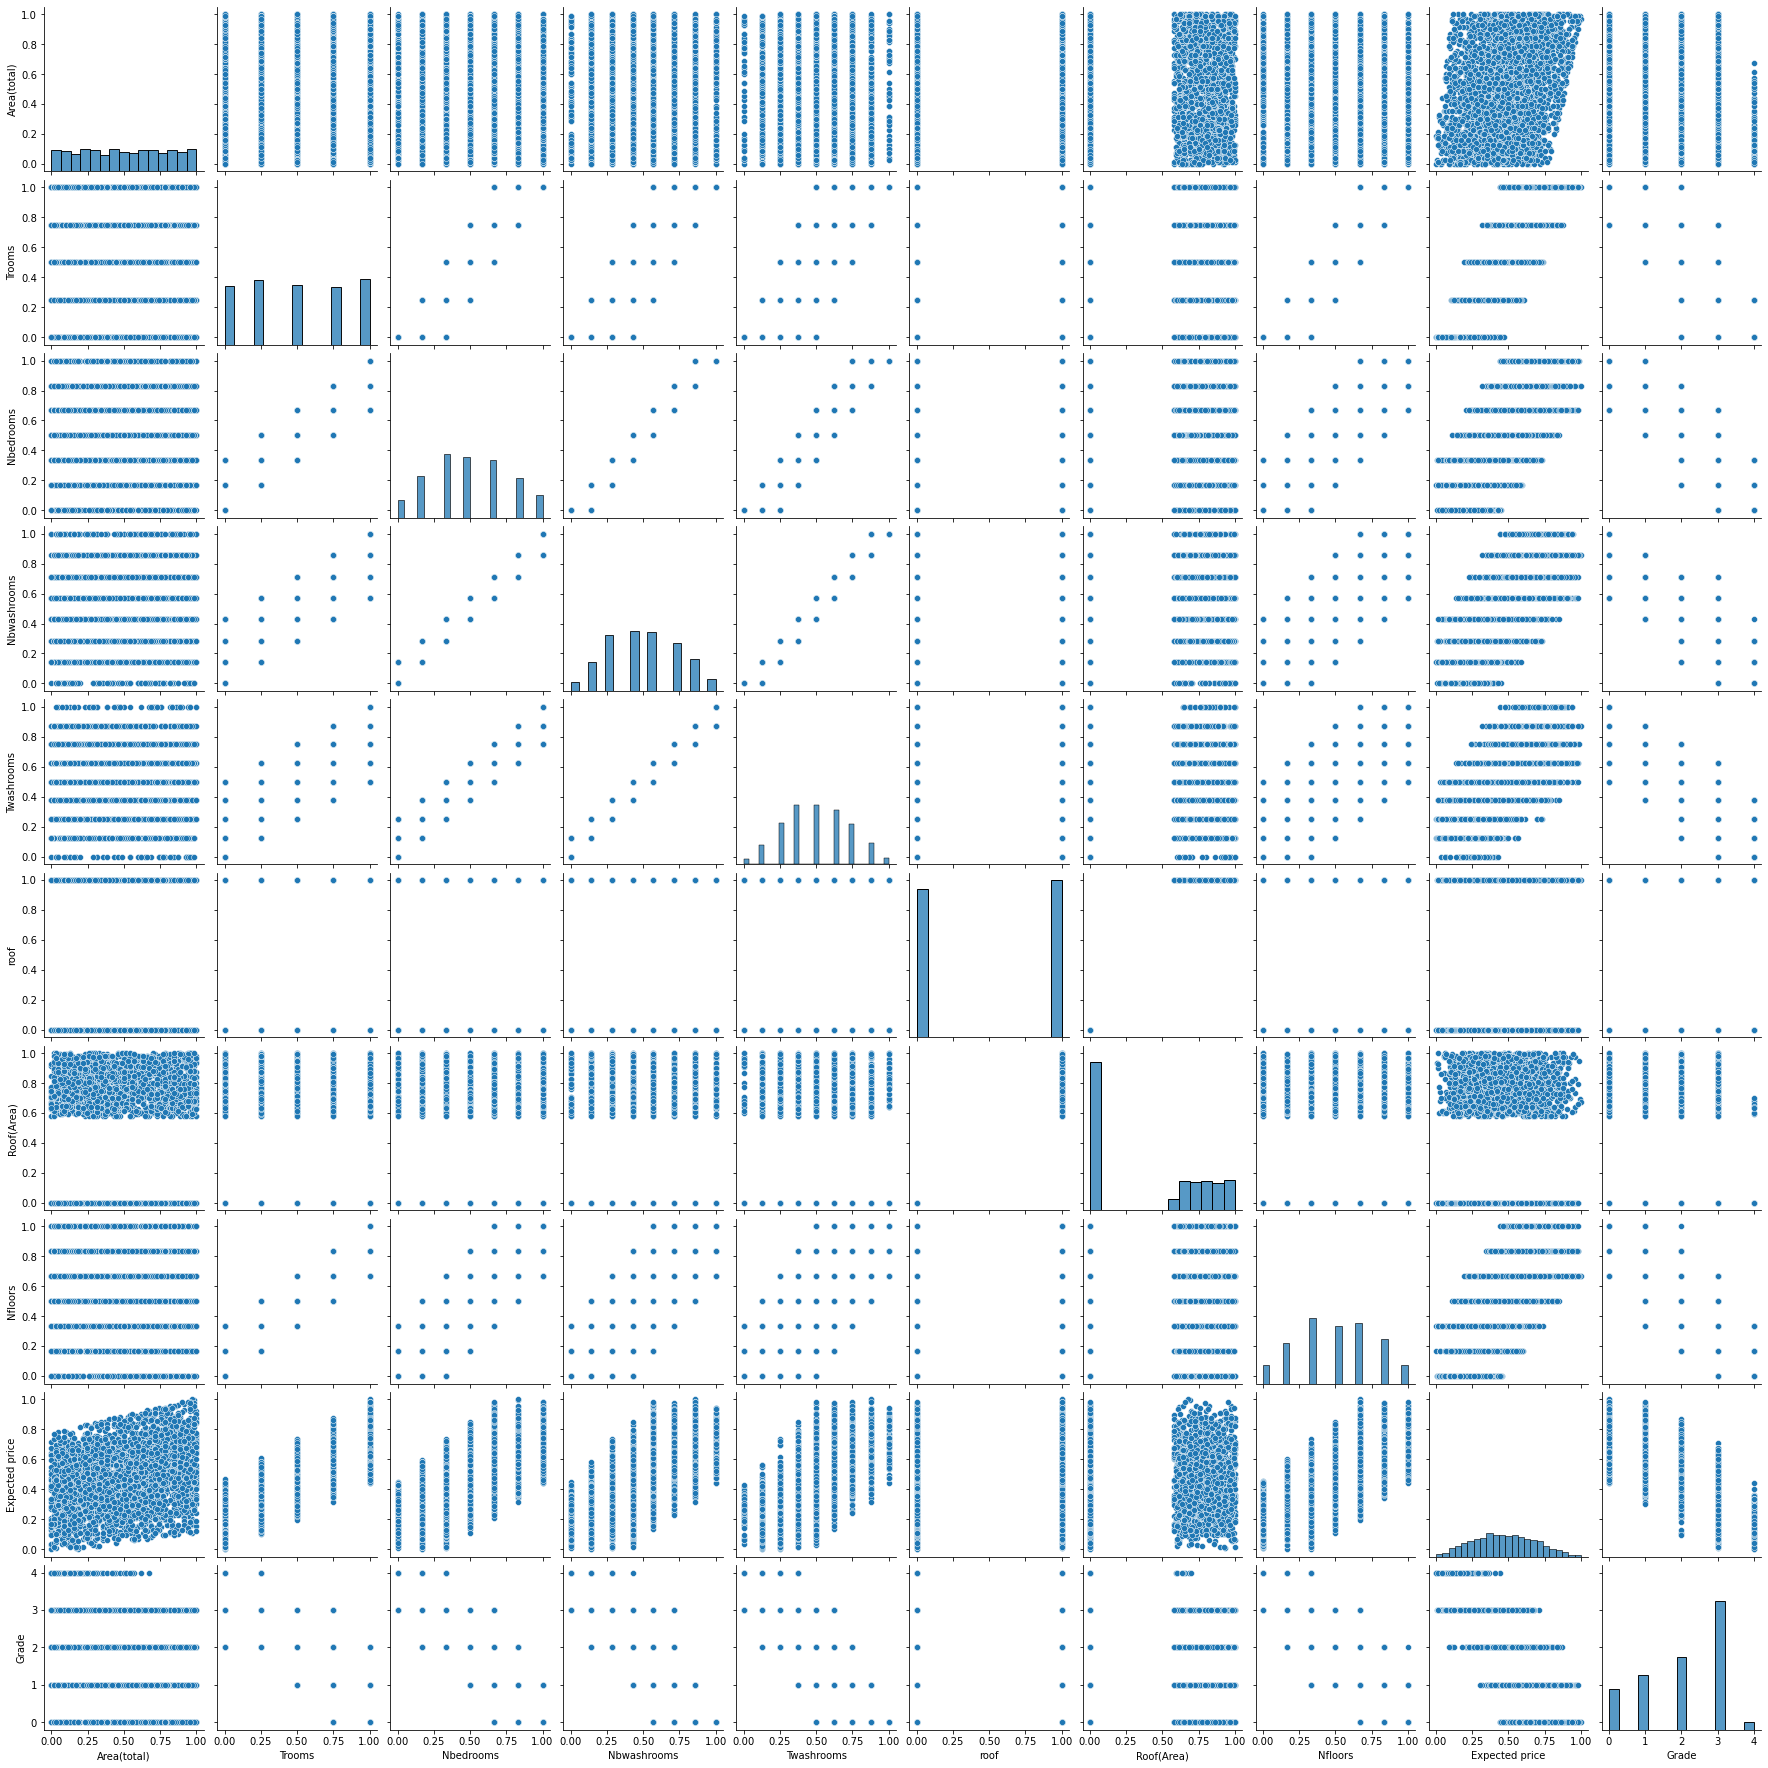

In [13]:
#pairplot
sns.pairplot(new_scaled_df)

<AxesSubplot:xlabel='Grade', ylabel='Area(total)'>

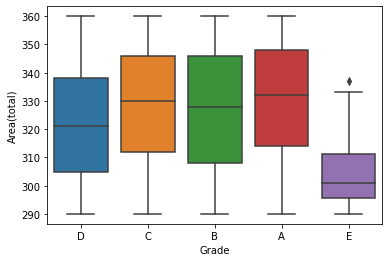

In [14]:
#Total area w.r.t different Grades
sns.boxplot(new_house_df['Grade'], new_house_df['Area(total)'])

In Grade-A the average total area is more. Whereas, Grade-E has least average total area.

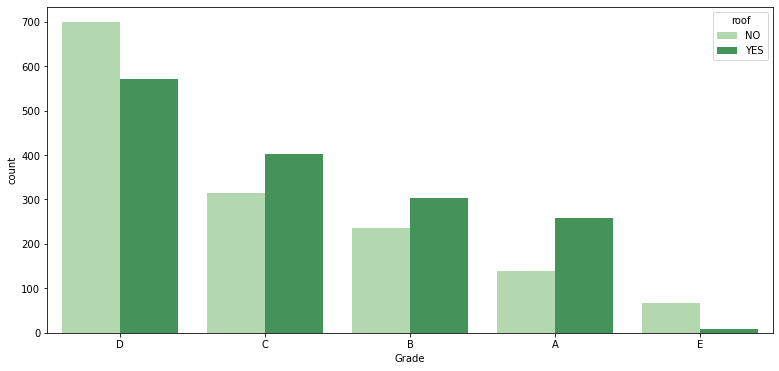

In [15]:
#Grade wise checking wheather roof is available or not
plt.figure(figsize=(13,6))
sns.countplot(data= new_house_df, x='Grade', hue='roof', palette='Greens')
plt.show()

In Grade-D,E most of the houses don't have roofs. Whereas, houses in Grade-A,B,C most of the houses have roofs.

<AxesSubplot:xlabel='Trooms', ylabel='count'>

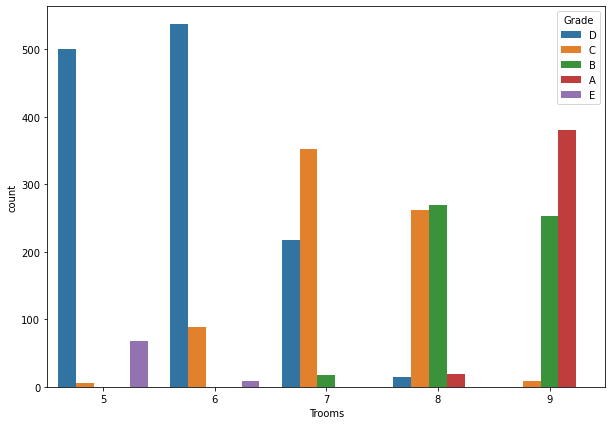

In [18]:
#total number of rooms w.r.t grade
plt.figure(figsize=(10,7))
sns.countplot(x=new_house_df['Trooms'], hue=new_house_df['Grade'])

In grade-A, the total number of rooms in the houses are: 8 and 9.

In grade-B, the total number of rooms in the houses are: 7,8 and 9.

In grade-C, the total number of rooms in the houses are: 6,7 and 8.

In grade-D, the total number of rooms in the houses are: 5,6 and 7.

In grade-E, the total number of rooms in the houses are: 5 and 6.

<AxesSubplot:xlabel='Nfloors', ylabel='count'>

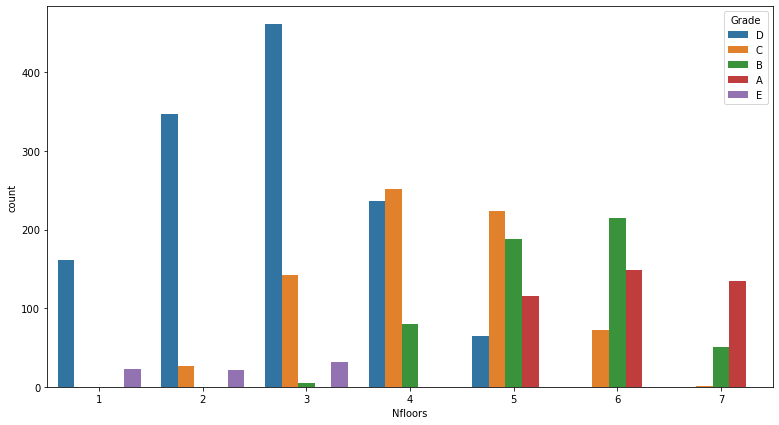

In [19]:
#total number of floors w.r.t grade
plt.figure(figsize=(13,7))
sns.countplot(x=new_house_df['Nfloors'], hue=new_house_df['Grade'])

Grade-A consists of houses with 5,6 and 7 floors.

Grade-B consists of houses with 4,5,6 and 7 floors.

Grade-C consists of houses with 3,4,5 and 6 floors.

Grade-D consists of houses with 1,2,3,4 and 5 floors.

Grade-E consists of houses with 1,2 and 3 floors.

In [20]:
#Defining x and y variable
X= new_scaled_df.drop('Grade',axis=1)
y= new_scaled_df['Grade']

In [21]:
#splitting the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)
print('X_train= {} \nX_test= {} \ny_train={} \ny_test={}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train= (2100, 9) 
X_test= (900, 9) 
y_train=(2100,) 
y_test=(900,)


# LogisticRegression

In [22]:
#model building
model1= LogisticRegression()

#training the model
model1.fit(X_train,y_train)

#predicting the values for test data
y_pred1= model1.predict(X_test)

In [23]:
#Performance of model
performance1= model1.score(X_train,y_train)
print('Performance of LogisticRegression- %.3f'%performance1)

Performance of LogisticRegression- 0.886


In [24]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

accuracy1= accuracy_score(y_test, y_pred1)
recall1= recall_score(y_test, y_pred1, average='weighted')
f1_score1= f1_score(y_test, y_pred1, average='weighted')
precision1=  precision_score(y_test, y_pred1, average='weighted')

print('accuracy:', accuracy1)
print('recall:', recall1)
print('f1-score:', f1_score1)
print('precision:',precision1)

accuracy: 0.8755555555555555
recall: 0.8755555555555555
f1-score: 0.8636093727607097
precision: 0.8539347825407874


In [25]:
#creating empty lists for comparing different scores
name=[]; accuracy=[]; f1_weighted=[]; f1_macro=[]; f1_micro=[]

In [27]:
# evaluate the model
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
accr_score1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1, error_score='raise')
#appending the accuracy scores in empty list
name.append('LR')
accuracy.append(accr_score1)
print('accuracy_Score: %.3f' % (np.mean(accr_score1)))

weighted_score1 = cross_val_score(model1, X, y, scoring='f1_weighted', cv=cv1, n_jobs=-1, error_score='raise')
#appending the f1_weighted scores in empty list
f1_weighted.append(weighted_score1)
print('F1-weighted_Score: %.3f' % (np.mean(weighted_score1)))

micro_score1 = cross_val_score(model1, X, y, scoring='f1_micro', cv=cv1, n_jobs=-1, error_score='raise')
#appending the f1_micro scores in empty list
f1_micro.append(micro_score1)
print('F1-micro_Score: %.3f' % (np.mean(micro_score1)))

macro_score1 = cross_val_score(model1, X, y, scoring='f1_macro', cv=cv1, n_jobs=-1, error_score='raise')
#appending the f1_macro scores in empty list
f1_macro.append(macro_score1)
print('F1-macro_Score: %.3f' % (np.mean(macro_score1)))

accuracy_Score: 0.883
F1-weighted_Score: 0.873
F1-micro_Score: 0.883
F1-macro_Score: 0.739


# Decision-Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

#defining the model
model2= DecisionTreeClassifier(max_depth=3)

#training the model
model2.fit(X_train, y_train)

#predicting the values of test data
y_pred2= model2.predict(X_test)

In [29]:
#Performance of model
performance2= model2.score(X_train,y_train)
print('Performance of DecisionTreeClassifier- %.3f'%performance2)

Performance of DecisionTreeClassifier- 0.799


In [30]:
accuracy2= accuracy_score(y_test, y_pred2)
recall2= recall_score(y_test, y_pred2, average='weighted')
f1_score2= f1_score(y_test, y_pred2, average='weighted')
precision2=  precision_score(y_test, y_pred2, average='weighted')

print('accuracy:', accuracy2)
print('recall:', recall2)
print('f1-score:', f1_score2)
print('precision:',precision2)

accuracy: 0.7522222222222222
recall: 0.7522222222222222
f1-score: 0.7412550272385219
precision: 0.7376985867401794


In [31]:
# evaluate the model
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
accr_score2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1, error_score='raise')
#appending the accuracy scores in empty list
name.append('DTC')
accuracy.append(accr_score2)
print('accuracy_Score: %.3f' % (np.mean(accr_score2)))

weighted_score2 = cross_val_score(model2, X, y, scoring='f1_weighted', cv=cv2, n_jobs=-1, error_score='raise')
#appending the f1_weighted scores in empty list
f1_weighted.append(weighted_score2)
print('F1-weighted_Score: %.3f' % (np.mean(weighted_score2)))

micro_score2 = cross_val_score(model2, X, y, scoring='f1_micro', cv=cv2, n_jobs=-1, error_score='raise')
#appending the f1_micro scores in empty list
f1_micro.append(micro_score2)
print('F1-micro_Score: %.3f' % (np.mean(micro_score2)))

macro_score2 = cross_val_score(model2, X, y, scoring='f1_macro', cv=cv2, n_jobs=-1, error_score='raise')
#appending the f1_macro scores in empty list
f1_macro.append(macro_score2)
print('F1-macro_Score: %.3f' % (np.mean(macro_score2)))

accuracy_Score: 0.752
F1-weighted_Score: 0.734
F1-micro_Score: 0.752
F1-macro_Score: 0.580


# RandomForestClassifier

In [32]:
#defining the model
model3= RandomForestClassifier(max_depth=3)

#training the model
model3.fit(X_train, y_train)

#predicting the values of test data
y_pred3= model3.predict(X_test)

In [33]:
#accuracy 
accuracy3= model3.score(X_train,y_train)
print('Accuracy: %.3f ' % accuracy3)

Accuracy: 0.814 


In [34]:
#Checking for best parameters for increasing accuracy using Gridsearch
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model3,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [35]:
#Grid search method
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(max_depth=3), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [36]:
#Finding the best score
grid_search.best_score_

0.87

In [37]:
#Finding best estimator
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=5)

In [38]:
#building model with the best_estimator
model3= RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200)

#training the model
model3.fit(X_train,y_train)

#predicting the values
y_pred3= model3.predict(X_test)

In [39]:
accuracy3= accuracy_score(y_test, y_pred3)
recall3= recall_score(y_test, y_pred3, average='weighted')
f1_score3= f1_score(y_test, y_pred3, average='weighted')
precision3=  precision_score(y_test, y_pred3, average='weighted')

print('accuracy:', accuracy3)
print('recall:', recall3)
print('f1-score:', f1_score3)
print('precision:',precision3)

accuracy: 0.8588888888888889
recall: 0.8588888888888889
f1-score: 0.8538794781852206
precision: 0.8554781490586788


In [40]:
#accuracy 
performance3= model3.score(X_train,y_train)
print('Performance of RandomForestClassifier: %.3f ' % performance3)

Performance of RandomForestClassifier: 0.918 


In [41]:
# evaluate the model
cv3 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
accr_score3 = cross_val_score(model3, X, y, scoring='accuracy', cv=cv2, n_jobs=-1, error_score='raise')
#appending the accuracy scores in empty list
name.append('RFC')
accuracy.append(accr_score3)
print('accuracy_Score: %.3f' % (np.mean(accr_score3)))

weighted_score3 = cross_val_score(model3, X, y, scoring='f1_weighted', cv=cv2, n_jobs=-1, error_score='raise')
#appending the f1_weighted scores in empty list
f1_weighted.append(weighted_score3)
print('F1-weighted_Score: %.3f' % (np.mean(weighted_score3)))

micro_score3 = cross_val_score(model3, X, y, scoring='f1_micro', cv=cv2, n_jobs=-1, error_score='raise')
#appending the f1_micro scores in empty list
f1_micro.append(micro_score3)
print('F1-micro_Score: %.3f' % (np.mean(micro_score3)))

macro_score3 = cross_val_score(model3, X, y, scoring='f1_macro', cv=cv2, n_jobs=-1, error_score='raise')
#appending the f1_macro scores in empty list
f1_macro.append(macro_score3)
print('F1-macro_Score: %.3f' % (np.mean(macro_score3)))

accuracy_Score: 0.879
F1-weighted_Score: 0.874
F1-micro_Score: 0.879
F1-macro_Score: 0.776


# Adaboost model

In [42]:
from sklearn.ensemble import AdaBoostClassifier
model4= AdaBoostClassifier()

#training the model
model4.fit(X_train,y_train)

#predicting the test data
y_pred4= model4.predict(X_test)

In [43]:
accuracy4= accuracy_score(y_test, y_pred4)
recall4= recall_score(y_test, y_pred4, average='weighted')
f1_score4= f1_score(y_test, y_pred4, average='weighted')
precision4=  precision_score(y_test, y_pred4, average='weighted')

print('accuracy:', accuracy4)
print('recall:', recall4)
print('f1-score:', f1_score4)
print('precision:',precision4)

accuracy: 0.5711111111111111
recall: 0.5711111111111111
f1-score: 0.5344397157681396
precision: 0.5532773444475366


In [44]:
#Performance of model
performance4= model4.score(X_train,y_train)
print('Performance of Adaboost model- %.3f'%performance4)

Performance of Adaboost model- 0.595


In [45]:
# evaluate the model
cv4 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
accr_score4 = cross_val_score(model4, X, y, scoring='accuracy', cv=cv2, n_jobs=-1, error_score='raise')
#appending the accuracy scores in empty list
name.append('ADA')
accuracy.append(accr_score4)
print('accuracy_Score: %.3f' % (np.mean(accr_score4)))

weighted_score4 = cross_val_score(model4, X, y, scoring='f1_weighted', cv=cv2, n_jobs=-1, error_score='raise')
#appending the f1_weighted scores in empty list
f1_weighted.append(weighted_score4)
print('F1-weighted_Score: %.3f' % (np.mean(weighted_score4)))

micro_score4 = cross_val_score(model4, X, y, scoring='f1_micro', cv=cv2, n_jobs=-1, error_score='raise')
#appending the f1_micro scores in empty list
f1_micro.append(micro_score4)
print('F1-micro_Score: %.3f' % (np.mean(micro_score4)))

macro_score4 = cross_val_score(model4, X, y, scoring='f1_macro', cv=cv2, n_jobs=-1, error_score='raise')
#appending the f1_macro scores in empty list
f1_macro.append(macro_score4)
print('F1-macro_Score: %.3f' % (np.mean(macro_score4)))

accuracy_Score: 0.602
F1-weighted_Score: 0.574
F1-micro_Score: 0.602
F1-macro_Score: 0.449


# Stacking

In [46]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

In [47]:
# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [48]:
#Defining the model
model5= get_stacking()

#training the model
model5.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()), ('bayes', GaussianNB())],
                   final_estimator=LogisticRegression())

In [55]:
#Predicting the values for test data
y_pred5= model5.predict(X_test)

array([2, 3, 2, 1, 2, 1, 1, 1, 0, 3, 1, 0, 0, 3, 0, 3, 0, 1, 4, 3, 0, 3,
       0, 0, 3, 0, 3, 1, 3, 0, 3, 1, 3, 2, 2, 1, 3, 3, 0, 1, 3, 3, 3, 3,
       3, 1, 1, 3, 3, 1, 1, 4, 3, 3, 3, 2, 2, 3, 2, 0, 3, 0, 3, 3, 0, 3,
       1, 1, 3, 1, 1, 0, 3, 3, 0, 3, 3, 2, 2, 1, 3, 3, 3, 2, 0, 1, 2, 3,
       3, 0, 2, 3, 0, 3, 2, 1, 3, 3, 1, 3, 3, 0, 1, 2, 3, 2, 3, 3, 1, 3,
       1, 0, 2, 0, 3, 2, 3, 0, 0, 3, 3, 3, 3, 1, 1, 3, 0, 3, 3, 3, 3, 1,
       2, 0, 1, 2, 2, 2, 1, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 1, 3, 3, 2, 3,
       0, 2, 3, 2, 3, 2, 3, 3, 3, 3, 0, 1, 1, 1, 1, 3, 0, 3, 2, 0, 3, 1,
       2, 3, 3, 2, 3, 0, 1, 3, 3, 0, 2, 1, 3, 3, 2, 2, 3, 3, 3, 3, 1, 4,
       0, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 3, 3, 1, 3, 0, 1, 3, 3, 3, 3, 3,
       2, 0, 0, 2, 3, 1, 2, 3, 0, 2, 1, 2, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2,
       1, 0, 3, 0, 3, 3, 3, 1, 3, 1, 2, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       0, 3, 1, 3, 4, 2, 3, 1, 1, 2, 2, 2, 0, 3, 1, 1, 0, 2, 1, 3, 1, 0,
       2, 2, 1, 1, 3, 0, 3, 3, 0, 3, 3, 2, 3, 1, 0,

In [50]:
accuracy5= accuracy_score(y_test, y_pred5)
recall5= recall_score(y_test, y_pred5, average='weighted')
f1_score5= f1_score(y_test, y_pred5, average='weighted')
precision5=  precision_score(y_test, y_pred5, average='weighted')

print('accuracy:', accuracy5)
print('recall:', recall5)
print('f1-score:', f1_score5)
print('precision:',precision5)

accuracy: 0.8766666666666667
recall: 0.8766666666666667
f1-score: 0.873762257556543
precision: 0.8727844918425088


In [51]:
#Performance of model
performance5= model5.score(X_train,y_train)
print('Performance of Stacking model- %.3f'%performance5)

Performance of Stacking model- 0.914


In [52]:
# evaluate the model
cv5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
accr_score5 = cross_val_score(model5, X, y, scoring='accuracy', cv=cv5, n_jobs=-1, error_score='raise')
#appending the accuracy scores in empty list
name.append('Stacking')
accuracy.append(accr_score5)
print('accuracy_Score: %.3f' % (np.mean(accr_score5)))

weighted_score5 = cross_val_score(model5, X, y, scoring='f1_weighted', cv=cv5, n_jobs=-1, error_score='raise')
#appending the f1_weighted scores in empty list
f1_weighted.append(weighted_score5)
print('F1-weighted_Score: %.3f' % (np.mean(weighted_score5)))

micro_score5 = cross_val_score(model5, X, y, scoring='f1_micro', cv=cv5, n_jobs=-1, error_score='raise')
#appending the f1_micro scores in empty list
f1_micro.append(micro_score5)
print('F1-micro_Score: %.3f' % (np.mean(micro_score5)))

macro_score5 = cross_val_score(model5, X, y, scoring='f1_macro', cv=cv5, n_jobs=-1, error_score='raise')
#appending the f1_macro scores in empty list
f1_macro.append(macro_score5)
print('F1-macro_Score: %.3f' % (np.mean(macro_score5)))

accuracy_Score: 0.887
F1-weighted_Score: 0.884
F1-micro_Score: 0.887
F1-macro_Score: 0.801


# comparing the models

In [53]:
new_df= pd.DataFrame({'Model':['LogisticRegression', 'DecisionTree', 'RandomForest', 'Adaboost', 'Stacking'], 
                      'accuracy':[accuracy1, accuracy2,accuracy3,accuracy4,accuracy5],
                      'recall_Score':[recall1, recall2, recall3, recall4,recall5],
                      'F1_score': [f1_score1, f1_score2, f1_score3,f1_score4,f1_score5],
                      'Precision':[precision1, precision2,precision3,precision4,precision5],
                      'Performance':[performance1,performance2,performance3,performance4,performance5]})
new_df

,Model,accuracy,recall_Score,F1_score,Precision,Performance
0,LogisticRegression,0.875556,0.875556,0.863609,0.853935,0.886190
1,DecisionTree,0.752222,0.752222,0.741255,0.737699,0.799048
2,RandomForest,0.858889,0.858889,0.853879,0.855478,0.918095
3,Adaboost,0.571111,0.571111,0.534440,0.553277,0.595238
4,Stacking,0.876667,0.876667,0.873762,0.872784,0.914286


In this dataset, after considering different models, stackingClassifier model has more accuracy in all the parameters as compared to other models. Whereas, AdaBoost model performance is very low.

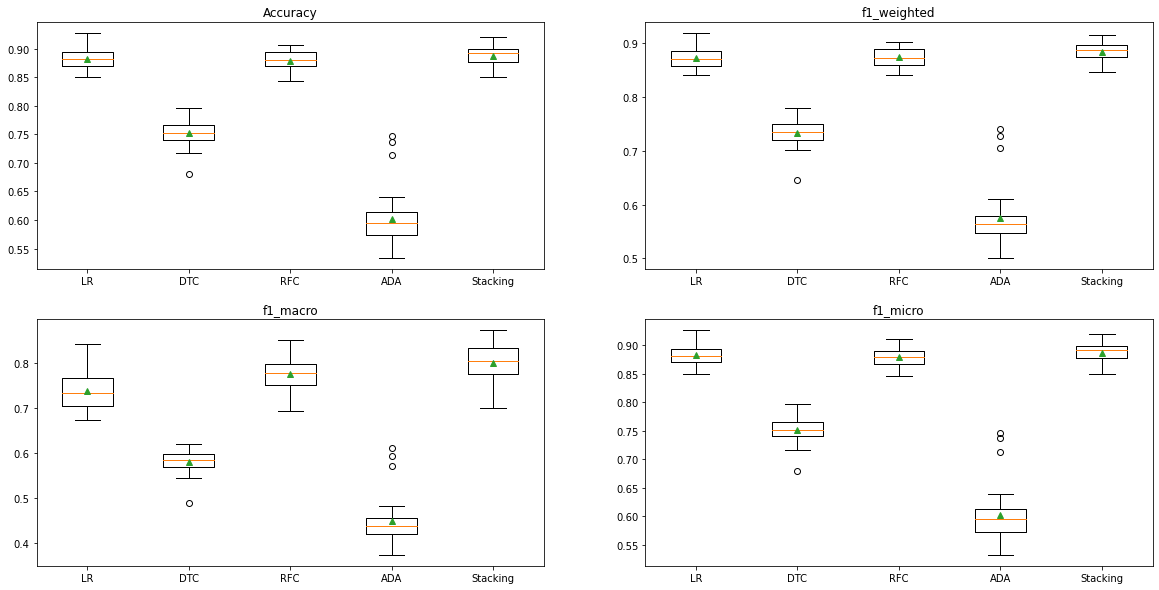

In [54]:
#comparing the models by visualizing through boxplot
fig,ax= plt.subplots(2,2,figsize=(20,10))

ax[0][0].set_title('Accuracy')
ax[0][0].boxplot(accuracy, labels=name,showmeans=True)

ax[0][1].set_title('f1_weighted')
ax[0][1].boxplot(f1_weighted, labels=name,showmeans=True)

ax[1][0].set_title('f1_macro')
ax[1][0].boxplot(f1_macro, labels=name,showmeans=True)

ax[1][1].set_title('f1_micro')
ax[1][1].boxplot(f1_micro, labels=name,showmeans=True)
plt.show()

For this dataset, after comparing all the models, Stacking has the highest accuracy/performance. Whereas Adaboost classifier has the least performance.

As the stacking method is best building the confusion matrix for the stacking algorithm

In [63]:
#Creating dataframe for actual and predicted values
pd.DataFrame({'Actual':y_test,'Predicted':y_pred5})

,Actual,Predicted
1957,2,2
2087,3,3
1394,2,2
1520,1,1
1098,2,2
...,...,...
2363,2,2
270,2,2
517,2,2
2383,0,0


These are predicted values by using the stacking algorithm.

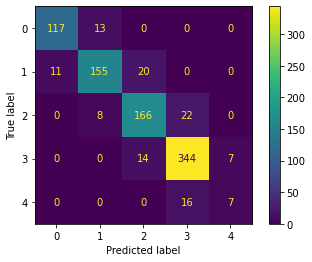

In [62]:
#displaying confusion matrix
cm= confusion_matrix(y_test,y_pred5)
cm_display = ConfusionMatrixDisplay(cm, display_labels =[0,1,2,3,4])
cm_display.plot()
plt.show()

In [66]:
#Checking class wise report using classication report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5,  target_names=['A','B','C','D','E']))

              precision    recall  f1-score   support

           A       0.91      0.90      0.91       130
           B       0.88      0.83      0.86       186
           C       0.83      0.85      0.84       196
           D       0.90      0.94      0.92       365
           E       0.50      0.30      0.38        23

    accuracy                           0.88       900
   macro avg       0.81      0.77      0.78       900
weighted avg       0.87      0.88      0.87       900



From the classification report, we can see class-wise accuracy. 

The accuracy is high in almost all the classes except class-'E'. The accuracy of predicting the class -'E' is very low.